In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os
import random
import seaborn
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model,save_model,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, BatchNormalization,Dropout
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
    train_datagen=ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    train_generator=train_datagen.flow_from_directory(
        'train',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical',
    )

Found 2400 images belonging to 8 classes.


In [11]:
    validation_datagen=ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical'
    )

Found 800 images belonging to 8 classes.


In [12]:
    test_datagen=ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

Found 800 images belonging to 8 classes.


In [15]:
num_classes=8
base_model = InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3))
base_model.trainable=True
#inputs=base_model.input
inputs = tf.keras.Input(shape=(128,128,3)) #Define input
x = base_model(inputs,training=False)     #pass input to base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs,outputs)  #Create model
model.compile(optimizer=Adam(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_resnet_v2 (Functional)     │ (None, 2, 2, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           8,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,918,824 (213.31 MB)

 Trainable params: 55,858,280 (213.08 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [17]:
epochs=10
training_history=model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

C:\Users\Sanzida\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 843s 8s/step - accuracy: 0.2426 - loss: 2.0064 - val_accuracy: 0.3288 - val_loss: 1.8762
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 548s 7s/step - accuracy: 0.7153 - loss: 1.3600 - val_accuracy: 0.5337 - val_loss: 1.5819
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 540s 7s/step - accuracy: 0.8313 - loss: 0.8397 - val_accuracy: 0.5813 - val_loss: 1.3227
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 530s 7s/step - accuracy: 0.8964 - loss: 0.5174 - val_accuracy: 0.5975 - val_loss: 1.1808
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 547s 7s/step - accuracy: 0.9383 - loss: 0.3178 - val_accuracy: 0.6438 - val_loss: 1.0438
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 588s 8s/step - accuracy: 0.9379 - loss: 0.2697 - val_accuracy: 0.6575 - val_loss: 0.9792
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 567s 8s/step - accuracy: 0.9630 - loss: 0.1826 - val_accuracy: 0.7325 - val_loss: 0.8371
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 550s 7s/step - accuracy: 0.9713 - loss: 0.1276 - val_accuracy: 0.7475 - v

In [18]:
test_loss,test_accuracy=model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9585 - loss: 0.2629
Test Loss: 0.9283344149589539, Test Accuracy: 0.8487499952316284


In [19]:
predictions=model.predict(test_generator)
predicted_classes=np.argmax(predictions,axis=1)
ture_classes=test_generator.classes
class_labels=['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']
report=metrics.classification_report(ture_classes,predicted_classes,target_names=class_labels)
print(report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step
                  precision    recall  f1-score   support

     Anthracnose       0.94      0.99      0.97       100
Bacterial Canker       0.98      0.96      0.97       100
  Cutting Weevil       0.99      1.00      1.00       100
        Die Back       1.00      0.86      0.92       100
      Gall Midge       0.84      1.00      0.91       100
         Healthy       0.69      0.99      0.81       100
  Powdery Mildew       0.67      0.98      0.80       100
     Sooty Mould       1.00      0.01      0.02       100

        accuracy                           0.85       800
       macro avg       0.89      0.85      0.80       800
    weighted avg       0.89      0.85      0.80       800



In [23]:
test_predictions=model.predict(test_generator)
trst_predicted_labels=np.argmax(test_predictions,axis=1)
test_true_labels=test_generator.classes

25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step


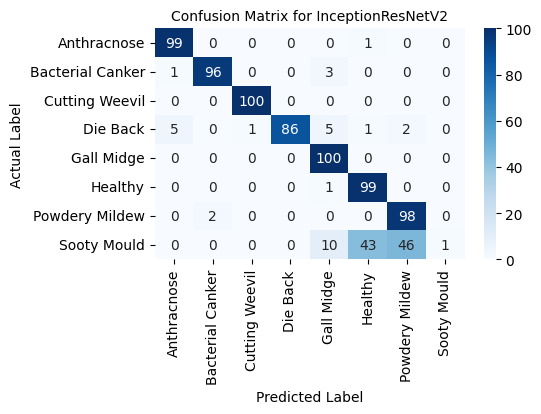

In [26]:

plt.figure(figsize=(5,3))
conf_matrix=confusion_matrix(test_true_labels,trst_predicted_labels)
class_names=list(test_generator.class_indices.keys())  # Extract class names
seaborn.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for InceptionResNetV2',fontsize=10)
plt.show()

In [27]:
num_classes=8
base_model = InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3))
base_model.trainable=False
#inputs=base_model.input
inputs = tf.keras.Input(shape=(128,128,3)) #Define input
x = base_model(inputs,training=False)     #pass input to base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs,outputs)  #Create model
model.compile(optimizer=Adam(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
epochs=10
training_history=model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.2730 - loss: 2.2704 - val_accuracy: 0.4487 - val_loss: 1.6403
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.5979 - loss: 1.2730 - val_accuracy: 0.5200 - val_loss: 1.4358
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.7231 - loss: 0.9540 - val_accuracy: 0.5888 - val_loss: 1.3247
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.7905 - loss: 0.7557 - val_accuracy: 0.6212 - val_loss: 1.2520
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8115 - loss: 0.6941 - val_accuracy: 0.6475 - val_loss: 1.2130
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.8226 - loss: 0.6128 - val_accuracy: 0.6525 - val_loss: 1.1570
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.8537 - loss: 0.5426 - val_accuracy: 0.6862 - val_loss: 1.0780
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8556 - loss: 0.4928 - val_accuracy: 0.6950 - v